In [54]:
from matplotlib import pyplot as plt
import random
import os
import pandas as pd
import polars as pl
import numpy as np
import seaborn as sns

In [70]:
def read_strip(file):
    df = pd.read_csv(file)
    df.insert(2, '2', df['0'].astype(str) + "_" + df['1'].astype(str))
    return df

In [74]:
files = ['table_data/agg_results_Solo_25k.csv',
        'table_data/agg_results_NoMem1-3_25k.csv',
        'table_data/agg_results_NoCur_25k-2.csv',
        'table_data/agg_results_Myopic_Hack_50k.csv',
        'table_data/agg_results_learnsolocopyfree_25k.csv']
csv_stack = [read_strip(each) for each in files]

for df in csv_stack:
    print(len(df['2'].unique()))

573
25000
573
25000
573
1
573
1
573
25000


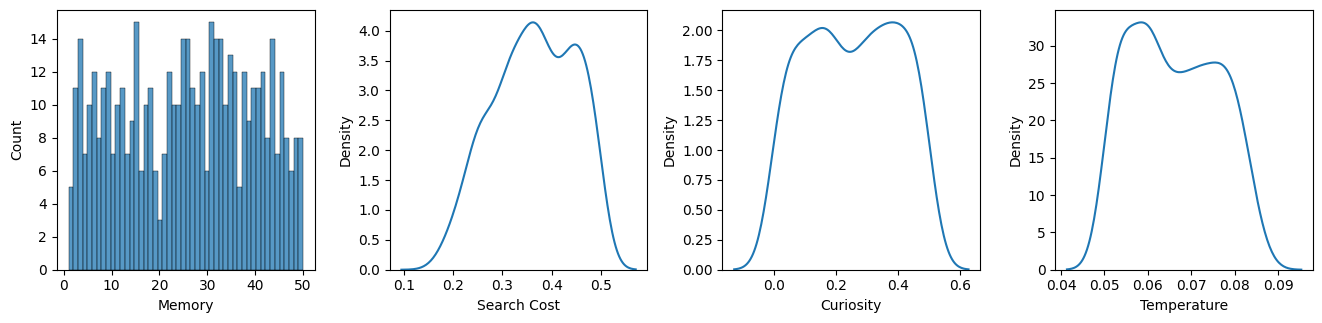

In [56]:
# Dataset,ExpId,Trial
trial_df = results.groupby(['0','1','ei','memory','search_cost','tau'])[['6']].mean()
trial_df = trial_df.reset_index()

howmany = 500
top = trial_df.sort_values(by=['6'],ascending=False)[0:howmany].copy()

fix,axs = plt.subplots(1,4,figsize=(13.33,3.33))
axes = axs.flatten()
sns.histplot(data=top, x='memory', ax=axes[0], bins=50)
sns.kdeplot(data=top, x='search_cost', ax=axes[1])
sns.kdeplot(data=top, x='ei', ax=axes[2])
sns.kdeplot(data=top, x='tau', ax=axes[3])

# axes[0].set_title('Memory')
# axes[1].set_title('Search Cost')
# axes[2].set_title('Curiosity')
# axes[3].set_title('Temperature')

axes[0].set_xlabel('Memory')
axes[1].set_xlabel('Search Cost')
axes[2].set_xlabel('Curiosity')
axes[3].set_xlabel('Temperature')

plt.tight_layout()
# plt.suptitle('Trial Level Parameters')
# plt.savefig('figures/4panel_MLE_trial.jpeg')
plt.show()

In [57]:
trial_df.sort_values(by=['6'],ascending=False)[0:5]

,0,1,ei,memory,search_cost,tau,6
12725881,2041,1,0.017269,31,0.485499,0.051004,-0.001403
12725929,2041,1,0.018279,28,0.498242,0.051989,-0.001421
12736308,2041,1,0.224086,41,0.498250,0.052430,-0.001600
12742398,2041,1,0.346907,11,0.489501,0.052750,-0.001987
12729251,2041,1,0.083696,3,0.496206,0.053447,-0.002038


In [58]:
# top.mean()

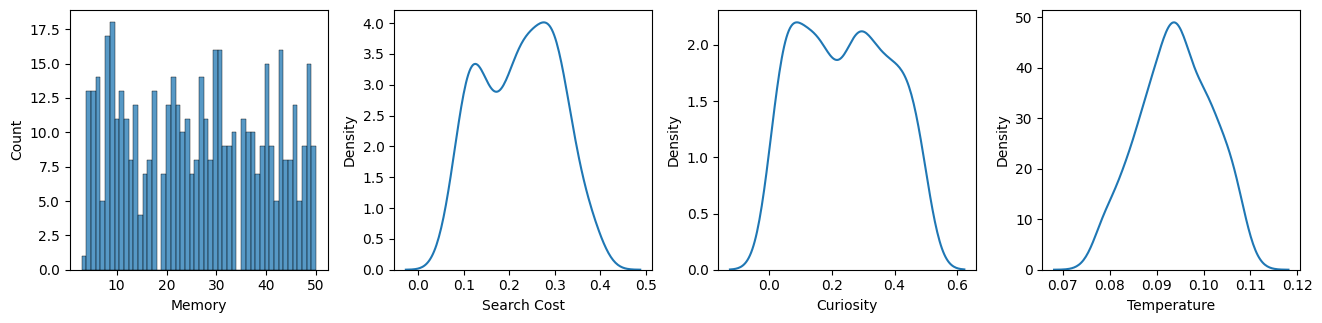

In [59]:
# Dataset,ExpId
trial_df = results.groupby(['0','ei','memory','search_cost','tau'])[['6']].mean()
trial_df = trial_df.reset_index()
# trial_df.sort_values(by=['6'],ascending=False)

howmany = 500
top = trial_df.sort_values(by=['6'],ascending=False)[0:howmany].copy()

fix,axs = plt.subplots(1,4,figsize=(13.33,3.33))
axes = axs.flatten()
sns.histplot(data=top, x='memory', ax=axes[0], bins=50)
sns.kdeplot(data=top, x='search_cost', ax=axes[1])
sns.kdeplot(data=top, x='ei', ax=axes[2])
sns.kdeplot(data=top, x='tau', ax=axes[3])

# axes[0].set_title('Memory')
# axes[1].set_title('Search Cost')
# axes[2].set_title('Curiosity')
# axes[3].set_title('Temperature')

axes[0].set_xlabel('Memory')
axes[1].set_xlabel('Search Cost')
axes[2].set_xlabel('Curiosity')
axes[3].set_xlabel('Temperature')

plt.tight_layout()
# plt.suptitle('ExpId Level Parameters')
# plt.savefig('figures/4panel_MLE_expid.jpeg')
# plt.show()

In [60]:
trial_df.sort_values(by=['6'],ascending=False)[0:5]

,0,ei,memory,search_cost,tau,6
1655001,2041,0.099262,8,0.188816,0.093564,-20.566628
1650847,2041,0.016455,24,0.191932,0.093181,-20.576317
1665934,2041,0.316997,44,0.209940,0.093615,-20.608863
1654166,2041,0.082111,31,0.189929,0.091777,-20.618025
1663104,2041,0.261188,13,0.217712,0.091063,-20.619724


In [61]:
# top.mean()

In [67]:
def process_raw(df_, howmany, level):

    # Dataset
    match level:
        case 'trial':
            df = df_.groupby(['0','1','ei','memory','search_cost','tau'])[['6']].mean()
            df = df.reset_index()
        case 'expid':
            df = df_.groupby(['0','ei','memory','search_cost','tau'])[['6']].mean()
            df = df.reset_index()
        case 'dataset':
            df = df_.groupby(['ei','memory','search_cost','tau'])[['6']].mean()
            df = df.reset_index()

    return df


    # howmany = 500
    # top_df = df.sort_values(by=['6'],ascending=False)[0:howmany].copy()

    # top5 = df.sort_values(by=['6'],ascending=False)[0:5].copy()
    # top5_mean = top5.mean()


    ### FIGURE STUFF
    # fix,axs = plt.subplots(1,4,figsize=(13.33,3.33))
    # axes = axs.flatten()
    # sns.histplot(data=top, x='memory', ax=axes[0], bins=50)
    # sns.kdeplot(data=top, x='search_cost', ax=axes[1])
    # sns.kdeplot(data=top, x='ei', ax=axes[2])
    # sns.kdeplot(data=top, x='tau', ax=axes[3])

    # axes[0].set_title('Memory')
    # axes[1].set_title('Search Cost')
    # axes[2].set_title('Curiosity')
    # axes[3].set_title('Temperature')

    # axes[0].set_xlabel('Memory')
    # axes[1].set_xlabel('Search Cost')
    # axes[2].set_xlabel('Curiosity')
    # axes[3].set_xlabel('Temperature')

    # plt.tight_layout()
    # plt.suptitle('Dataset Level Parameters')
    # plt.savefig('figures/4panel_MLE_dataset.jpeg')
    # plt.show()

In [69]:
example = process_raw(results, 500, 'trial')

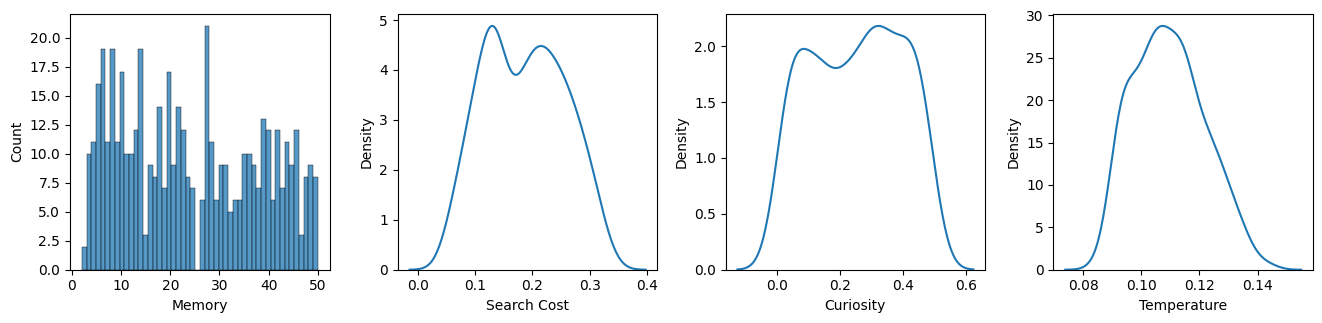

In [62]:
# Dataset
trial_df = results.groupby(['ei','memory','search_cost','tau'])[['6']].mean()
trial_df = trial_df.reset_index()
# trial_df.sort_values(by=['6'],ascending=False)

howmany = 500
top = trial_df.sort_values(by=['6'],ascending=False)[0:howmany].copy()

fix,axs = plt.subplots(1,4,figsize=(13.33,3.33))
axes = axs.flatten()
sns.histplot(data=top, x='memory', ax=axes[0], bins=50)
sns.kdeplot(data=top, x='search_cost', ax=axes[1])
sns.kdeplot(data=top, x='ei', ax=axes[2])
sns.kdeplot(data=top, x='tau', ax=axes[3])

# axes[0].set_title('Memory')
# axes[1].set_title('Search Cost')
# axes[2].set_title('Curiosity')
# axes[3].set_title('Temperature')

axes[0].set_xlabel('Memory')
axes[1].set_xlabel('Search Cost')
axes[2].set_xlabel('Curiosity')
axes[3].set_xlabel('Temperature')

plt.tight_layout()
# plt.suptitle('Dataset Level Parameters')
# plt.savefig('figures/4panel_MLE_dataset.jpeg')
# plt.show()

In [63]:
trial_df.sort_values(by=['6'],ascending=False)[0:5]
top.mean()

,ei,memory,search_cost,tau,6
1260,0.024188,5,0.157348,0.111481,-221.942034
15706,0.312768,6,0.147529,0.112136,-222.275342
6726,0.133748,7,0.121475,0.114113,-223.533478
14042,0.279881,10,0.148985,0.110044,-223.883198
3413,0.066609,7,0.184434,0.110807,-224.109756


In [64]:
top.mean()

ei               0.252466
memory          24.164000
search_cost      0.186075
tau              0.109560
6             -231.857106
dtype: float64